In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/twitter"  # Make sure this is the correct path to your file
df = pd.read_csv(file_path, header=None)  # Read without header
df.columns = ['id', 'game', 'sentiment', 'text'] # Rename columns
print(df.head())
print(df.info())
print(df['text'].sample(10))

     id         game sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   game       74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
8877                                                   NaN
33093    

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np # Import numpy to check for NaN values

nltk.download('stopwords')
nltk.download('wordnet')

stop = set(stopwords.words('english'))
lemm = WordNetLemmatizer()

def clean_text(txt):
    # Since missing values are handled before calling this function,
    # we can assume the input is a string or has been converted to string representation by fillna and astype(str).
    # We can keep the isinstance check as an extra safeguard.
    if not isinstance(txt, str):
        return ""
    txt = txt.lower()
    txt = re.sub(r'http\S+','', txt)
    txt = re.sub(r'@\w+','', txt)
    txt = re.sub(r'#','', txt)
    txt = re.sub(r'[^a-z0-9\s]','', txt)
    tokens = txt.split()
    tokens = [lemm.lemmatize(t) for t in tokens if t not in stop]
    return " ".join(tokens)

# Fill missing values with empty strings and then convert the column to string type
df['cleaned'] = df['text'].fillna('').astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['cleaned'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
# then maybe convert score to label:
df['sentiment_label'] = df['sentiment_score'].apply(lambda s:
    'positive' if s > 0.05 else ('negative' if s < -0.05 else 'neutral'))


In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
res = sentiment_pipeline(df['cleaned'].tolist())
# Parse ’label’ and ’score’ etc


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
# Convert date column to datetime if present
# df['date'] = pd.to_datetime(df['timestamp_column']) # Commented out as 'timestamp_column' does not exist

# Example: daily average sentiment
# daily = df.resample('D', on='date')['sentiment_score'].mean().reset_index() # Commented out as 'date' column is not created

# Example: sentiment distribution by brand
# Assuming 'game' column can be used as a proxy for 'brand'
brand_sent = df.groupby('game')['sentiment_label'].value_counts(normalize=True).unstack().fillna(0)

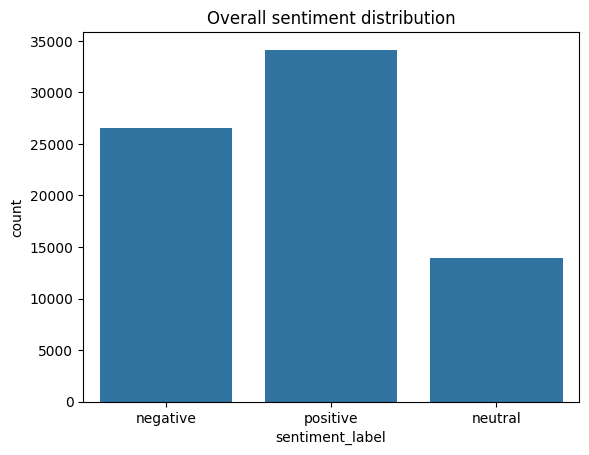

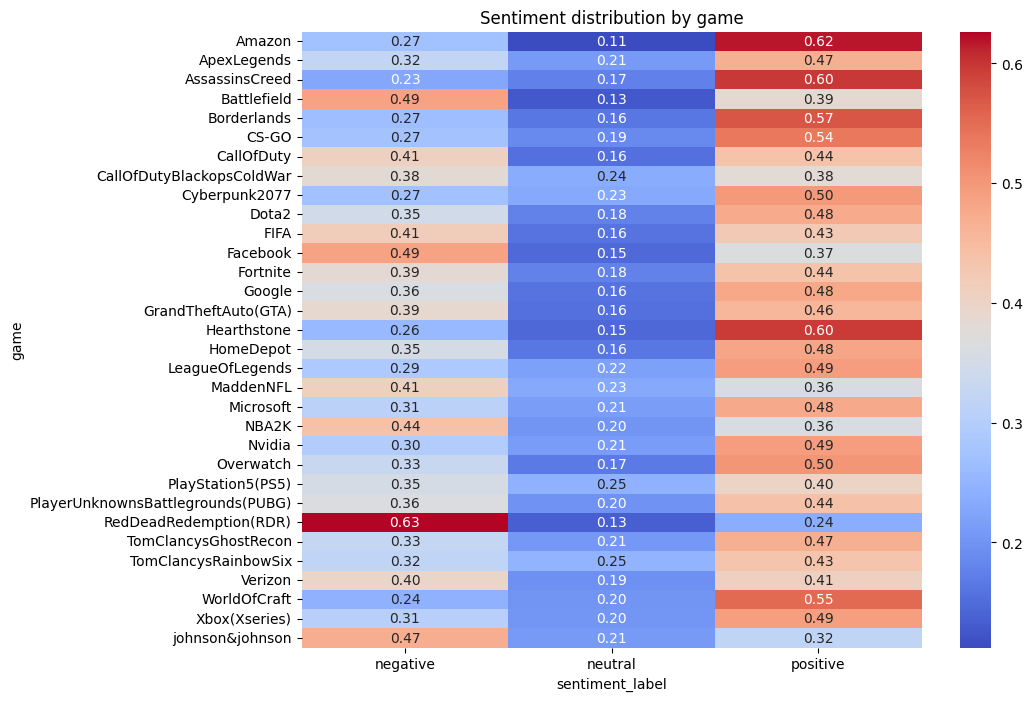

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of overall sentiment labels
sns.countplot(data=df, x='sentiment_label')
plt.title("Overall sentiment distribution")
plt.show()

# Line chart of daily average sentiment
# plt.figure(figsize=(12,6)) # Commented out as 'daily' variable is not created
# sns.lineplot(data=daily, x='date', y='sentiment_score') # Commented out as 'daily' variable is not created
# plt.title("Daily average sentiment score over time") # Commented out as 'daily' variable is not created
# plt.show() # Commented out as 'daily' variable is not created

# Heatmap for brand vs sentiment label
plt.figure(figsize=(10,8))
# Using 'game' as a proxy for 'brand' as used in the previous cell
sns.heatmap(brand_sent, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Sentiment distribution by game") # Updated title to reflect 'game'
plt.show()

##Summary

* Data Loading and Cleaning: The notebook loads data from a CSV file, renames columns, and performs text cleaning by removing URLs, mentions, hashtags, and special characters. It also handles missing text values by replacing them with empty strings.
Sentiment Analysis using VADER: The VADER sentiment analysis tool is used to calculate a compound sentiment score for each cleaned text entry. These scores are then categorized into 'positive', 'negative', or 'neutral' labels based on predefined thresholds.

 * Sentiment Distribution by Game: The analysis then calculates the distribution of sentiment labels for each game in the dataset, providing insights into how positively or negatively each game is perceived in the text data.

* Visualization: The notebook includes visualizations to show the overall sentiment distribution and a heatmap illustrating the sentiment distribution across different games. The heatmap of sentiment distribution by game is particularly insightful, as it shows the proportion of positive, neutral, and negative sentiment for each game